<a href="https://colab.research.google.com/github/rasikapnarkhede/Image-caption-generator-using-deep-learning-/blob/main/Image_Caption_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import cv2
import os
from glob import glob

In [ ]:
images_path = '/content/drive/MyDrive/Flickr_Data/Images/'
images = glob(images_path+'*.jpg')
len(images)

8091

In [ ]:
from keras.applications import ResNet50
incept_model = ResNet50(include_top=True)

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from keras.models import Model
last = incept_model.layers[-2].output
modele = Model(inputs = incept_model.input,outputs = last)
modele.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
import cv2
images_features = {}
count = 0
for i in images:
    # Read and preprocess the image
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Resize image to 224x224 (model expects this size)
    img = cv2.resize(img, (224, 224))
    img = img.reshape(1, 224, 224, 3) / 255.0  # Normalize to [0,1]
    # Predict using the model
    pred = modele.predict(img)
    # Store the predictions
    img_name = i.split('/')[-1]
    images_features[img_name] = pred

    count += 1
    if count > 1499:
        break
    elif count % 50 == 0:
        print(f"Processed {count} images")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [ ]:
len(images_features)

1500

#Text Preprocess

In [ ]:
caption_path = '/content/drive/MyDrive/Flickr_Data/Flickr_TextData/Flickr8k.token.txt'

In [ ]:
captions = open(caption_path, 'rb').read().decode('utf-8').split('\n')

In [ ]:
len(captions)


40461

In [ ]:
captions_dict = {}
for i in captions:
    try:
        img_name = i.split('\t')[0][:-2]
        caption = i.split('\t')[1]
        if img_name in images_features:
            if img_name not in captions_dict:
                captions_dict[img_name] = [caption]
            else:
                captions_dict[img_name].append(caption)
    except:
        pass

In [ ]:
len(captions_dict)

1500

#Visualize Images with captions

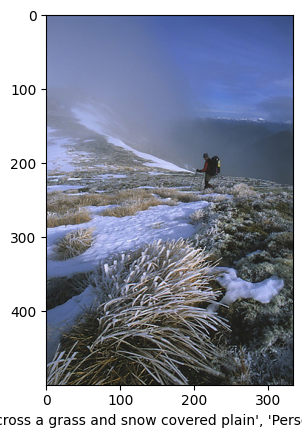

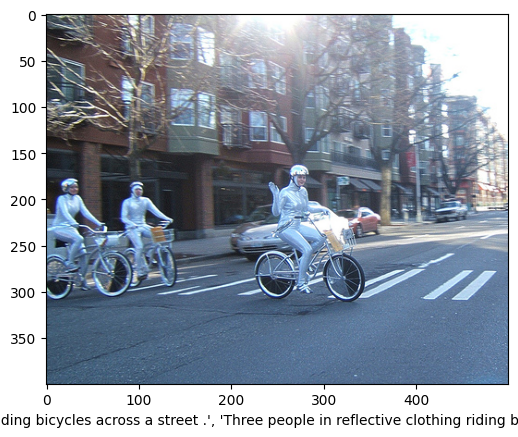

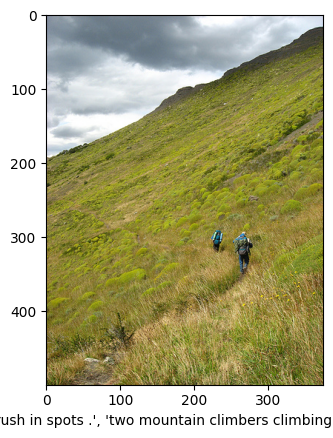

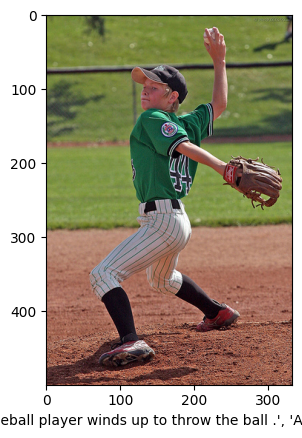

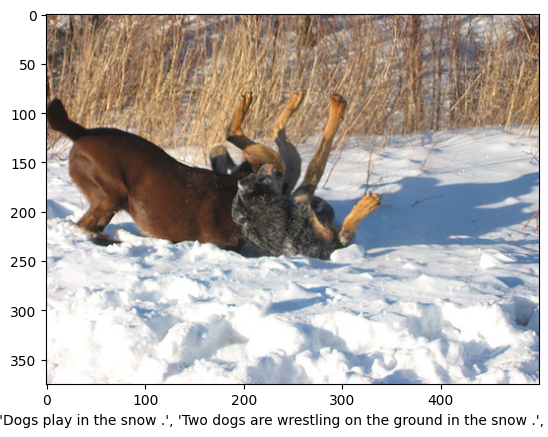

In [ ]:
import matplotlib.pyplot as plt
for i in range(5):
    plt.figure()
    img_name = images[i]
    img = cv2.imread(img_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(captions_dict[img_name.split('/')[-1]])
    plt.imshow(img)

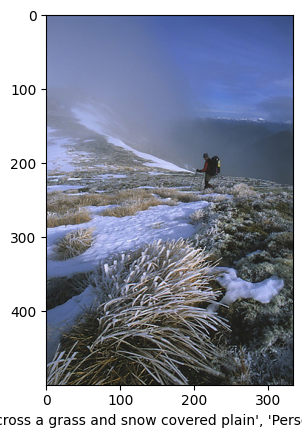

In [ ]:
import matplotlib.pyplot as plt
for k in images_features.keys():
    plt.figure()
    img_name = '/content/drive/MyDrive/Flickr_Data/Images/' + k
    img = cv2.imread(img_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(captions_dict[img_name.split('/')[-1]])
    plt.imshow(img)
    break

In [ ]:
def preprocessed(txt):
    modified = txt.lower()
    modified = 'startofseq ' + modified + ' endofseq'
    return modified

In [ ]:
for k,v in captions_dict.items():
    for vv in v:
        captions_dict[k][v.index(vv)] = preprocessed(vv)


#Create Vocabulary

In [ ]:
count_words = {}
for k,vv in captions_dict.items():
    for v in vv:
        for word in v.split():
            if word not in count_words:
                count_words[word] = 0
            else:
                count_words[word] += 1

In [ ]:
len(count_words)

3981

In [ ]:
THRESH = -1
count = 1
new_dict = {}
for k,v in count_words.items():
    if count_words[k] > THRESH:
        new_dict[k] = count
        count += 1

In [ ]:
len(new_dict)

3981

In [ ]:
captions_backup = captions_dict.copy()


In [ ]:
captions_dict = captions_backup.copy()


In [ ]:
for k, vv in captions_dict.items():
    for v in vv:
        encoded = []
        for word in v.split():
            if word not in new_dict:
                encoded.append(new_dict['<OUT>'])
            else:
                encoded.append(new_dict[word])


        captions_dict[k][vv.index(v)] = encoded

In [ ]:
captions_dict


{'3508882611_3947c0dbf5.jpg': [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
  [1, 2, 14, 15, 7, 4, 16, 17, 2, 18, 19, 12, 13],
  [1, 2, 20, 21, 2, 7, 22, 8, 9, 10, 11, 12, 13],
  [1, 2, 20, 5, 23, 2, 11, 24, 2, 15, 7, 16, 2, 25, 13],
  [1, 26, 27, 6, 7, 8, 28, 11, 24, 29, 30, 13]],
 '3511890331_6163612bb9.jpg': [[1,
   2,
   31,
   32,
   33,
   34,
   2,
   35,
   36,
   37,
   2,
   38,
   39,
   40,
   2,
   41,
   42,
   12,
   13],
  [1, 2, 31, 32, 33, 43, 2, 36, 44, 2, 45, 46, 12, 13],
  [1, 2, 31, 47, 2, 36, 48, 2, 38, 39, 12, 13],
  [1, 2, 31, 49, 2, 33, 50, 4, 51, 2, 52, 53, 36, 32, 2, 54, 12, 13],
  [1, 2, 55, 49, 33, 43, 2, 53, 36, 56, 2, 57, 58, 12, 13]],
 '3513265399_a32e8cfd18.jpg': [[1,
   2,
   59,
   60,
   61,
   62,
   32,
   2,
   63,
   64,
   59,
   65,
   32,
   9,
   66,
   67,
   12,
   13],
  [1, 2, 68, 4, 69, 70, 62, 71, 21, 72, 73, 4, 74, 12, 13],
  [1, 2, 60, 4, 69, 70, 62, 71, 24, 72, 73, 75, 76, 12, 13],
  [1, 2, 77, 4, 69, 70, 62, 78, 72, 79, 80, 72, 71,

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [ ]:
# Define MAX_LEN
MAX_LEN = 30  # or calculate it dynamically

Batch_size = 32
VOCAB_SIZE = len(new_dict)

def generator(photo, caption):
    n_samples = 0

    X = []
    y_in = []
    y_out = []
    #these loop for appending the images
    for k, vv in caption.items():
      #These loop for the 5 caption of the images
        for v in vv:
            for i in range(1, len(v)):
              #These loop for the single caption in list of 5
                X.append(photo[k])

                in_seq = [v[:i]]
                #in_seq [1,2,45]-----> [1,2,45,0,0,0,0,0,0,] upto 34 lenght
                out_seq = v[i]


                in_seq = pad_sequences(in_seq, maxlen=MAX_LEN, padding='post', truncating='post')[0]
                out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE)[0]

                y_in.append(in_seq)
                y_out.append(out_seq)

    return X, y_in, y_out

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Define MAX_LEN
MAX_LEN = 30
VOCAB_SIZE = len(new_dict)

def generator(photo, caption, batch_size=32):
    """
    A generator function that yields batches of image features and encoded captions.
    """
    while True:  # Infinite loop to generate batches
        X = []
        y_in = []
        y_out = []
        count = 0

        for img_name, captions in caption.items():
            for caption_sequence in captions:
                for i in range(1, len(caption_sequence)):
                    X.append(photo[img_name])  # Image feature
                    in_seq = pad_sequences([caption_sequence[:i]], maxlen=MAX_LEN, padding='post')[0]
                    out_seq = to_categorical([caption_sequence[i]], num_classes=VOCAB_SIZE)[0]

                    y_in.append(in_seq)
                    y_out.append(out_seq)

                    count += 1
                    if count == batch_size:
                        yield np.array(X, dtype=np.float32), np.array(y_in, dtype=np.float32), np.array(y_out, dtype=np.float32)
                        X, y_in, y_out = [], [], []  # Reset batch
                        count = 0



In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Define MAX_LEN
MAX_LEN = 30
VOCAB_SIZE = len(new_dict)

import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

MAX_LEN = 30
VOCAB_SIZE = len(new_dict)

def generator(photo, caption, batch_size=32):
    """
    A generator function that yields batches of image features and encoded captions.
    """
    while True:  # Infinite loop to generate batches
        X_img, X_text, y_out = [], [], []
        count = 0

        for img_name, captions in caption.items():
            for caption_sequence in captions:
                for i in range(1, len(caption_sequence)):
                    X_img.append(photo[img_name])  # Image feature vector (2048-d)
                    in_seq = pad_sequences([caption_sequence[:i]], maxlen=MAX_LEN, padding='post')[0]
                    out_seq = to_categorical(caption_sequence[i], num_classes=VOCAB_SIZE)  # One-hot encoding

                    X_text.append(in_seq)
                    y_out.append(out_seq)

                    count += 1
                    if count == batch_size:
                        yield ([np.array(X_img, dtype=np.float32),
                                np.array(X_text, dtype=np.float32)],
                               np.array(y_out, dtype=np.float32))
                        X_img, X_text, y_out = [], [], []  # Reset batch
                        count = 0



In [ ]:
import numpy as np

X = np.array(X)  # Convert list to NumPy array
X = X.reshape(-1, 2048)  # Now reshape works


In [ ]:
len(X), len(y_in), len(y_out)

(32, 32, 32)

In [ ]:
X = np.array(X)
y_in = np.array(y_in, dtype='float64')
y_out = np.array(y_out, dtype='float64')

In [ ]:
X.shape, y_in.shape, y_out.shape

((32, 2048), (32, 30), (32, 3982))

In [ ]:
!pip install keras

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, Flatten, Activation
from tensorflow.keras.layers import TimeDistributed, Bidirectional, RepeatVector, Concatenate, add
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
import numpy as np
import tensorflow as tf
from keras.models import Model
from keras.layers import (Input, Dense, LSTM, Embedding, Dropout,
                          RepeatVector, Concatenate, TimeDistributed, Activation,
                          Bidirectional, LayerNormalization, MultiHeadAttention)

# === Hyperparameters ===
embedding_size = 300  # Better word representation
max_len = 30  # Adjust as needed
vocab_size = len(new_dict)  # Vocabulary size

# === Image Model (Pretrained CNN Feature Extraction) ===
image_input = Input(shape=(2048,))
image_model = Dense(embedding_size, activation='relu')(image_input)
image_model = LayerNormalization()(image_model)  # Helps stabilize activations
image_model = RepeatVector(max_len)(image_model)

# === Language Model (Using Pretrained Word Embeddings) ===
language_input = Input(shape=(max_len,))

# 🔹 Load GloVe embeddings (pretrained)
embedding_matrix = np.random.randn(vocab_size, embedding_size)  # Replace with actual GloVe matrix if available
embedding_layer = Embedding(input_dim=vocab_size,
                            output_dim=embedding_size,
                            input_length=max_len,
                            weights=[embedding_matrix],  # Use pretrained embeddings
                            trainable=False)  # Freeze pretrained weights
language_model = embedding_layer(language_input)

# 🔹 Use LayerNormalization for more stable training
language_model = Bidirectional(LSTM(512, return_sequences=True, dropout=0.3, recurrent_dropout=0.3))(language_model)
language_model = LayerNormalization()(language_model)
language_model = TimeDistributed(Dense(embedding_size))(language_model)

# === Multi-Head Attention ===
multi_head_attention = MultiHeadAttention(num_heads=8, key_dim=embedding_size)
attention_output = multi_head_attention(language_model, image_model)
attention_output = Concatenate()([attention_output, language_model])  # Merge attention and language model outputs

# === Combined Model ===
x = Bidirectional(LSTM(512, return_sequences=True, dropout=0.3, recurrent_dropout=0.3))(attention_output)
x = LayerNormalization()(x)
x = LSTM(1024, return_sequences=False, dropout=0.4)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)

# === Define & Compile Model with Better Learning Rate Decay ===
model = Model(inputs=[image_input, language_input], outputs=out)

# 🔹 Use cosine learning rate decay for smoother updates
lr_schedule = tf.keras.optimizers.schedules.CosineDecay(initial_learning_rate=0.001, decay_steps=10000)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# === Model Summary ===
model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 30)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 30, 300)        │      1,194,600 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_3             │ (None, 2048)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_2           │ (None, 30, 1024)       │      3,330,048 │ embedding_1[0][0]      │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 300)            │        614,700 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_2     │ (None, 30, 1024)       │          2,048 │ bidirectional_2[0][0]  │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_1     │ (None, 300)            │            600 │ dense_4[0][0]          │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ time_distributed_1        │ (None, 30, 300)        │        307,500 │ layer_normalization_2… │
│ (TimeDistributed)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ repeat_vector_1           │ (None, 30, 300)        │              0 │ layer_normalization_1… │
│ (RepeatVector)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_1    │ (None, 30, 300)        │      2,887,500 │ time_distributed_1[0]… │
│ (MultiHeadAttention)      │                        │                │ repeat_vector_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 30, 600)        │              0 │ multi_head_attention_… │
│ (Concatenate)             │                        │                │ time_distributed_1[0]… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_3           │ (None, 30, 1024)       │      4,558,848 │ concatenate_1[0][0]    │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_3     │ (None, 30, 1024)       │          2,048 │ bidirectional_3[0][0]  │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_5 (LSTM)             │ (None, 1024)           │      8,392,704 │ layer_normalization_3… │
├──────────────────────

 Total params: 26,421,746 (100.79 MB)

 Trainable params: 25,227,146 (96.23 MB)

 Non-trainable params: 1,194,600 (4.56 MB)